# MultiImagePlotter Demo with CIFAR10
For this, we need to have CIFAR10 data organized in subfolders (one for each class). We can then use the standard Aggregator, which returns an image and the corresponding filename.

# Prerequisites

In [1]:
import numpy as np
from pathlib import Path
from collections import Counter

import torch
from torchvision.datasets import CIFAR10, SVHN, MNIST, EMNIST
from torchvision.transforms import Compose, ToTensor, Grayscale, Normalize, Resize
from torchvision.models import resnet18

from hyperpyper.utils import IndexToClassLabelDecoder, ClassToIndexLabelDecoder, FileToClassLabelDecoder
from hyperpyper.utils import DataSetDumper, VisionDatasetDumper
from hyperpyper.utils import FolderScanner as fs
from hyperpyper.utils import Pickler
from hyperpyper.utils import EmbeddingPlotter
from hyperpyper.utils import PipelineCache
from hyperpyper.utils import PathList
from hyperpyper.transforms import (FileToPIL,
                            DummyPIL,
                            PILToNumpy,
                            FlattenArray,
                            DebugTransform,
                            ProjectTransform,
                            PyTorchOutput,
                            PyTorchEmbedding,
                            ToDevice,
                            FlattenTensor,
                            CachingTransform,
                            PILTranspose)
from hyperpyper.aggregator import DataAggregator, DataSetAggregator
from hyperpyper.utils import MultiImagePlotter, MultiImageFilePlotter

import matplotlib.pyplot as plt

import plotly.graph_objs as go
import plotly.express as px
import ipywidgets as widgets

from IPython.display import display


random_state = 23

In [2]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print("Running on device:", DEVICE.upper())

Running on device: CUDA


In [3]:
ROOT_PATH = Path.home() / "Downloads" / "data"

DATA_PATH = ROOT_PATH / "CIFAR10"

DATA_PATH_TEST = Path(DATA_PATH, "test")
DATA_PATH_TRAIN = Path(DATA_PATH, "train")

## Create CIFAR10 dataset organized in subfolders indicating class
The VisionDatasetDumper handles the download and the creation of a folder structure where images are stored. They can then be used as the starting point for experiments. We only need the dataset returned by the VisionDatasetDumper to extract the class labels to be able to match them with class indices.

In [4]:
train_dataset = VisionDatasetDumper(CIFAR10, root=DATA_PATH, dst=DATA_PATH_TRAIN, train=True).dump()

Files already downloaded and verified


In [5]:
train_files = fs.get_files(DATA_PATH_TRAIN, extensions='.png', recursive=True)

len(train_files)

50000

In [6]:
import random

# Select a random item
selected_files = random.sample(train_files, 8)
selected_files

[WindowsPath('C:/Users/bernh/Downloads/data/CIFAR10/train/6/21228.png'),
 WindowsPath('C:/Users/bernh/Downloads/data/CIFAR10/train/9/13724.png'),
 WindowsPath('C:/Users/bernh/Downloads/data/CIFAR10/train/4/41148.png'),
 WindowsPath('C:/Users/bernh/Downloads/data/CIFAR10/train/0/17383.png'),
 WindowsPath('C:/Users/bernh/Downloads/data/CIFAR10/train/2/48194.png'),
 WindowsPath('C:/Users/bernh/Downloads/data/CIFAR10/train/9/31571.png'),
 WindowsPath('C:/Users/bernh/Downloads/data/CIFAR10/train/5/21709.png'),
 WindowsPath('C:/Users/bernh/Downloads/data/CIFAR10/train/8/30601.png')]

In [7]:
# Extract class indices from filenames
file_encoder = FileToClassLabelDecoder()
train_y = file_encoder(selected_files)

# Convert indices to class labels
label_decoder = IndexToClassLabelDecoder(train_dataset.classes)
train_y_str = label_decoder(train_y)

train_y_str

['frog', 'truck', 'deer', 'airplane', 'bird', 'truck', 'dog', 'ship']

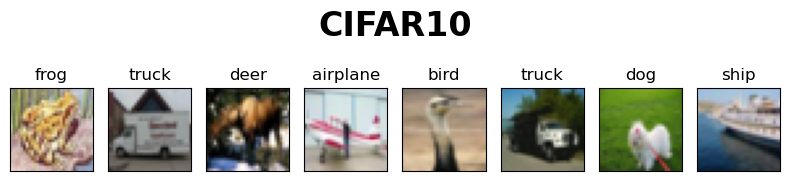

In [17]:
fig = MultiImageFilePlotter(selected_files,
                titles = train_y_str,
                #titles = [],
                #title_prefix = 'label: ',
                #title_postfix = ' (idx)',
                layout = 'vector',
                # rotate = True,
                #frame = False,
                suptitle = "CIFAR10",
                suptitle_fontsize = 24,
                suptitle_fontweight = 'bold', 
                figsize = (8,2)).plot()

matplotlib.figure.Figure

In [9]:
from PIL import Image
#from pathlib import Path
from typing import Union, List

def load_images(files: List[Union[str, Path]], mode: str = 'RGB') -> List[Image.Image]:
    """
    Load images from a list of filenames.

    Args:
        files (List[Union[str, Path]]): List of filenames.
        mode (str, optional): Mode to use when loading images. Defaults to 'RGB'.

    Returns:
        List[Image.Image]: List of PIL images.
    """
    images = []
    for file in files:
        file_path = Path(file) if isinstance(file, str) else file
        image = Image.open(file_path).convert(mode)
        images.append(image)

    return images

In [10]:
selected_imgs = load_images(selected_files)

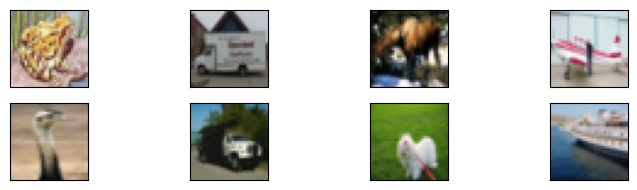

In [11]:
fig = MultiImagePlotter(selected_imgs,
                #titles = train_y_str,
                #titles = [],
                #title_prefix = 'label: ',
                #title_postfix = ' (idx)',                
                #layout = 'vector',
                #rotate = True,
                #frame = True,
                #suptitle = "CIFAR10",
                #suptitle_fontsize = 24,
                #suptitle_fontweight = 'bold', 
                figsize = (8,2)).plot()

In [12]:
assert False

AssertionError: 

In [ ]:
DATA_PATH = ROOT_PATH / "SVHN"

DATA_PATH_TEST = Path(DATA_PATH, "test")
DATA_PATH_TRAIN = Path(DATA_PATH, "train")

train_dataset = VisionDatasetDumper(SVHN, root=DATA_PATH, dst=DATA_PATH_TRAIN, train=True).dump()

In [ ]:
DATA_PATH = ROOT_PATH / "MNIST"

DATA_PATH_TEST = Path(DATA_PATH, "test")
DATA_PATH_TRAIN = Path(DATA_PATH, "train")

train_dataset = VisionDatasetDumper(MNIST, root=DATA_PATH, dst=DATA_PATH_TRAIN, train=True).dump()

In [ ]:
DATA_PATH = ROOT_PATH / "EMNIST"

DATA_PATH_TEST = Path(DATA_PATH, "test")
DATA_PATH_TRAIN = Path(DATA_PATH, "train")

transform = Compose([
    PILTranspose(),
    ToTensor(),
])

train_dataset = VisionDatasetDumper(EMNIST, root=DATA_PATH, dst=DATA_PATH_TRAIN, split='letters', train=True, transform=transform).dump()

In [ ]:
train_dataset

In [ ]:
assert False

In [ ]:
from hyperpyper.utils import DatasetRandSamplePlotter

fig = DatasetRandSamplePlotter(train_dataset).plot()

In [ ]:
fig = DatasetRandSamplePlotter(train_dataset, frame=False).plot()

In [ ]:
fig = DatasetRandSamplePlotter(train_dataset, title_label=True).plot()

In [ ]:
train_dataset.classes

In [ ]:
fig = DatasetRandSamplePlotter(train_dataset, title_label=True, classes=train_dataset.classes).plot()

In [ ]:
fig = DatasetRandSamplePlotter(train_dataset, title_label=True, figsize=(4,4)).plot()

In [ ]:
fig = DatasetRandSamplePlotter(train_dataset, n_samples=9, title_label=True, figsize=(6,3)).plot()

In [ ]:
fig = DatasetRandSamplePlotter(train_dataset, n_samples=9, title_label=True, title_prefix='IDX: ', figsize=(6,6)).plot()

In [ ]:
fig = DatasetRandSamplePlotter(train_dataset, n_samples=9, title_label=True, title_prefix='IDX: ', figsize=(6,6), title="CIFAR10", title_fontsize=16).plot()

### Retrieve a list of files